In [3]:
#import the following libraries
import pandas as pd


In [4]:
df = pd.read_csv("netflix_titles.csv")


In [5]:
#Convert text to all lowercase
df['new_description'] = df['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['new_description'].head()

0    as her father nears the end of his life, filmm...
1    after crossing paths at a party, a cape town t...
2    to protect his family from a powerful drug lor...
3    feuds, flirtations and toilet talk go down amo...
4    in a city of coaching centers known to train i...
Name: new_description, dtype: object

In [6]:
#remove the punctuation
df['new_description'] = df['new_description'].str.replace('[^\w\s]','')
df['new_description'].head()

C:\Users\yangj\AppData\Local\Temp/ipykernel_19472/3326839784.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_description'] = df['new_description'].str.replace('[^\w\s]','')


0    as her father nears the end of his life filmma...
1    after crossing paths at a party a cape town te...
2    to protect his family from a powerful drug lor...
3    feuds flirtations and toilet talk go down amon...
4    in a city of coaching centers known to train i...
Name: new_description, dtype: object

In [10]:
# import nltk
# nltk.download('nltk')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['text_lemmatized'] = df['new_description'].apply(lemmatize_text)

SyntaxError: invalid syntax (Temp/ipykernel_19472/140140336.py, line 4)

In [13]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_description,text_lemmatized
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",as her father nears the end of his life filmma...,"[a, her, father, nears, the, end, of, his, lif..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",after crossing paths at a party a cape town te...,"[after, crossing, path, at, a, party, a, cape,..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,to protect his family from a powerful drug lor...,"[to, protect, his, family, from, a, powerful, ..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",feuds flirtations and toilet talk go down amon...,"[feud, flirtation, and, toilet, talk, go, down..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,in a city of coaching centers known to train i...,"[in, a, city, of, coaching, center, known, to,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",a political cartoonist a crime reporter and a ...,"[a, political, cartoonist, a, crime, reporter,..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",while living alone in a spooky town a young gi...,"[while, living, alone, in, a, spooky, town, a,..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,looking to survive in a world taken over by zo...,"[looking, to, survive, in, a, world, taken, ov..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",dragged from civilian life a former superhero ...,"[dragged, from, civilian, life, a, former, sup..."


In [15]:
all_words = ' '.join([text for text in df['new_description']]) 

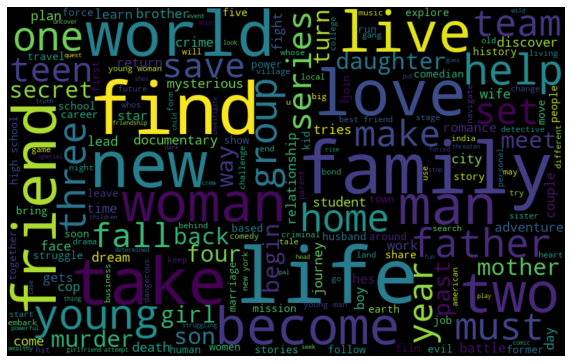

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [27]:
#Split training and Testing (Total number of rows: 8808)
total = df[['rating', 'description']]

from sklearn.model_selection import train_test_split

train, test = train_test_split(total, test_size=0.2)


In [47]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")
w2v_model = Word2Vec(min_count=3,
                     window=4,
                     
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

In [56]:
from sklearn.cluster import KMeans
word_vectors = Word2Vec.load("word2vec.model").wv
model = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=50).fit(X=word_vectors.vectors)
positive_cluster_center = model.cluster_centers_[0]
negative_cluster_center = model.cluster_centers_[1]

In [57]:
model.cluster_centers_


array([[ 4.5772539e-03, -1.4563074e-03,  2.4113827e-03,  3.6987774e-03,
        -3.7557199e-03, -4.2702206e-03,  1.2098181e-03,  3.6022370e-03,
        -4.1870968e-03, -4.6422058e-03,  4.5946389e-03, -6.8780303e-04,
         7.2984979e-04,  1.1190420e-03, -5.0046714e-04,  1.2562021e-03,
         3.3317157e-03, -1.9269884e-03, -1.3741568e-03, -8.5312556e-03,
         3.3694884e-04,  4.5796687e-04,  3.5234126e-03, -3.5310423e-03,
        -1.4193172e-03, -4.2561753e-04, -3.5758617e-03,  3.2284283e-03,
        -9.0983987e-04,  3.3935683e-04, -9.5160678e-04,  1.4878436e-03,
         3.6350901e-03,  1.0692116e-03, -2.2714005e-03,  1.5633714e-03,
         1.4886551e-04, -2.2593965e-03, -4.3499772e-03, -2.1279098e-03,
         2.1420396e-04,  1.8041395e-04, -1.5176125e-03,  3.5854866e-04,
         5.1174045e-04, -5.9545401e-04, -3.1448745e-03,  2.2696142e-04,
         6.5262988e-04,  4.0813764e-03, -2.8626481e-03, -7.1348582e-04,
        -9.0704684e-04,  1.7712323e-03, -8.5476041e-04, -2.10221